# Домашнее задание 4

__Дедлайн: 04.12.2022, 23:59__

Файлы должны иметь имя HW4_ФАМИЛИЯ.ipynb, где ФАМИЛИЯ - Ваша фамилия русскими буквами. 

Решение каждой задачи необходимо поместить после её условия.

Пожалуйста, пишите свои решения чётко и понятно. 
При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться **без ошибок**. 

Во всех задачах, где требуется сравнить методы, требуется аккуратное офрмление графиков, если Вы их будете строить, и комментарии к графикам (кто кого быстрее и когда сходится, какие интересные моменты Вы видите на графиках, как Вы их можете объяснить). Аналогично, требуются комментарии в случае, если Вы сравниваете время работы.

Суммарное количество баллов: 35

# Задача 1. LogSumExp Minimization [11]


Рассмотрим задачу минимизации LogSumExp с $\ell_2$-регуляризацией:

$$\min_{\mathbf{x}\in\mathbb{R}^n} \log \left(\sum_{j=1}^k \exp\left(\mathbf{a}_j^\top \mathbf{x} - b_j\right)\right) + \frac{\sigma}{2}\|\mathbf{x}\|_2^2$$

Параметры задачи: $\sigma$ - параметр регуляризации, $A\in\mathbb{R}^{k \times n}$ - матрица, каждая строчка которой есть вектор $\mathbf{a}_j$, $\mathbf{b}$ - вектор констант $b_j$.

Параметр $\sigma$ возьмите равным $10^{-2}$. Матрицу $A$ и вектор $\mathbf{b}$ загрузите из файлов `A.npy` и `b.npy` из папки `data/task1`.

**Задачи**

1. [4] Разработаем эффективный метод Ньютона для этой задачи с учетом структуры функции:

    - Рассмотрим задачу вида:
    
        $$\min_{\mathbf{x}\in\mathbb{R}^n} f(\mathbf{x})=\sum\limits_{i=1}^n \phi(x_i) + \psi(Ax+b)$$
      где $\phi:\mathbb{R}\rightarrow \mathbb{R}, \psi:\mathbb{R}^k \rightarrow \mathbb{R}, A\in\mathbb{R}^{k\times n}$. Найдите гессиан функции $f$ и выпишите СЛАУ, определяющую шаг метода Ньютона из точки $\mathbf{x}$.
      
    - Покажите, что решение системы с предыдущего пункта эквивалентно решению системы с дополнительной переменной $\mathbf{u}$:
    
$$\begin{bmatrix}D & A^\top L \\ L^\top A & -I\end{bmatrix} \begin{bmatrix}\mathbf{h} \\ \mathbf{u}\end{bmatrix} = \begin{bmatrix}-\nabla{f}\left(\mathbf{x}\right) \\ \mathbf{0}\end{bmatrix},$$

где $D$ - гессиан функции $\sum\limits_{i=1}^n \phi(x_i)$ (диагональная матрица), $H_\psi=LL^\top$ гессиан функции $\psi$ в точке $A\mathbf{x}+\mathbf{b}$ и его разложение Холецкого.
    
- Предлагается решить системы выше сначала по $\mathbf{u}$, а после этого выразить искомое направление $\mathbf{h}$ через $\mathbf{u}$. Выпишите в явном виде формулы для нахождения $\mathbf{u}$ и $\mathbf{h}$ таким образом.
    
- Оцените сложность решения системы Ньютона получившимся образом в зависимости от $k$ и $n$

2. [3] Реализуйте метод Ньютона для решаемой задачи способом, полученным во 2-ом пункте

3. [2] Постройте график зависимости времени работы базового метода Ньютона и модифицированного от количества строчек в матрице $A$

4. [1] Сравните по итерациям, построенные на семинаре квазиньютоновские методы для полной матрицы $A$:

    - DFP
    - BFGS
    - BB с обоими типами шагов
    - L-BFGS (с различным размером памяти)

5. [1] Сравните метод Ньютона и наиболее быстрый метод с предыдущего пункта по времени в зависимости от количества строчек в матрице $A$. В данном случае, под методом ньютона для каждого отдельного $m$ подразумевается наиболее быстрый из модифицированного и немодифицированного (см. пункт 4)

*Пояснения к задаче:*

1. Сложность построения разложения Холецкого для матрицы размерности $n$ - $O(n^3)$

2. Сложность решения СЛАУ в размерности $n$ - $O(n^3)$

3. Для того, чтобы построить зависимость от количества строчек в матрице $A$, нужно выбрать некоторое количество строчек, а остальные отбросить. Предлагается выбирать первые строчки. Таким образом, для того чтобы построить график на отрезке $[1,100]$ с шагом 10 нужно взять первую строчку из матрицы, первые 10, первые 20 ... первые 100.

4. Если возникают проблемы с устойчивостью вычисления разложения Холецкого для гессиана $H_\psi$, то они могут быть исправлены вычислением разложения для матрицы $H_\psi+\varepsilon E$ ($\varepsilon$ - малое число, $E$ - единичная матрица) вместо разложения для честного гессиана

## Решение задачи 1: 

### Пункт 1

1) $H_f = \frac{∂^2 f}{∂x^2} = diag(\frac{∂^2 ϕ}{∂ x^2}) + A^T \frac{∂^2 Ψ(Ax+b)}{∂(Ax+b)^2} A = D + A^T LL^T A$

СЛАУ, опред шаг метода Ньютона: $H_f(\mathbf{x})\mathbf{h} = -\nabla f(\mathbf{x})$

2) Распишем эту систему

$D \mathbf{h} + A^TL\mathbf{u} =  -\nabla f(x)$

$L^T A \mathbf{h} = \mathbf{u}$

Подставим вторую строчку в первую

$D \mathbf{h} + A^TLL^T A \mathbf{h} =  -\nabla f(x)$

Что очевидно эквивалентно нашей

3) Решим систему по u

$\begin{equation}
  \left\{
    \begin{aligned}
      & D\mathbf{h} + A^T L \mathbf{u} = -\nabla f(x) \\
      & L^T A \mathbf{h} - \mathbf{u} = 0
    \end{aligned}
  \right.
\end{equation} $

Для этого сделаем одинаковые множители перед h и избавимся от него

$\begin{equation}
  \left\{
    \begin{aligned}
      & L^T A\mathbf{h} + L^T A D^{-1}A^T L \mathbf{u} = -L^T A D^{-1}\nabla f(x) \\
      & L^T A \mathbf{h} = \mathbf{u}
    \end{aligned}
  \right.
\end{equation} $

$\begin{equation}
  \left\{
    \begin{aligned}
      & \mathbf{u} + L^T A D^{-1}A^T L \mathbf{u} = -L^T A D^{-1}\nabla f(x) \\
      & L^T A \mathbf{h} = \mathbf{u}
    \end{aligned}
  \right.
\end{equation} $

Тогда 

$ (I + L^T A D^{-1}A^T L) \mathbf{u} = -L^T A D^{-1}\nabla f(x)$

$\mathbf{u} = - (I + L^T A D^{-1}A^T L)^{-1}L^T A D^{-1}\nabla f(x)$

Тогда если найти u то h находится из первой строчки системы:

$\mathbf{h} = -D^{-1}\nabla f(x) - D^{-1}A^T L \mathbf{u}$

4) 

Обращение матриц - $O(k^3)$

Умножение - $O(k^2n)$

Итого при $k << n - O(k^2n)$




In [ ]:
import jax
import numpy as np
import jax.numpy as jnp
from jax.config import config
import os
import time
import scipy

In [ ]:
config.update("jax_enable_x64", True)

In [ ]:
def LSE_base(x):
    """
    :param x: np.array[n], input vector
    :return: Value of LSE(x)=log(sum_{i=1}^n e^{x_i})
    """
    x_max = x.max()
    val = jax.scipy.special.logsumexp(x)
    return val

def getLSE_base():
    """
    :return: callable objects: function, gradient and hessian for the base LSE
    """
    f = lambda x: LSE_base(x)
    gradf = jax.grad(LSE_base, argnums=0, has_aux=False)
    jit_gradf = jax.jit(gradf)
    gradf = lambda x: np.array(jit_gradf(x).block_until_ready())
    hess_func = jax.jit(jax.hessian(LSE_base))
    hessian = lambda x: hess_func(x).block_until_ready()
    return f, gradf, hessian

In [ ]:
def LSE(x, A, b, sigma=0):
    """
    :param x: np.array[n], input vector
    :param A: np.array[m, n], parameter of function, matrix A
    :param b: np.array[m], parameter of function, constant vector b
    :param sigma: float, regularization parameter
    :return: Value of LSE(Ax-b) + sigma/2 * ||x||^2
    """
    y = A @ x - b
    val = jax.scipy.special.logsumexp(y)
    l2_val = sigma / 2 * jnp.sum(x ** 2)
    return val + l2_val

def getLSE(A, b, sigma=0):
    """
    :param A: np.array[m, n], parameter of function, matrix A
    :param b: np.array[m], parameter of function, constant vector b
    :param sigma: float, regularization parameter
    :return: callable objects: function, gradient and hessian.
    """
    f = lambda x: LSE(x, A, b, sigma=sigma)
    gradf = jax.grad(LSE, argnums=0, has_aux=False)
    jit_gradf = jax.jit(gradf)
    gradf = lambda x: np.array(jit_gradf(x, A, b, sigma).block_until_ready())
    hess_func = jax.jit(jax.hessian(LSE))
    hessian = lambda x: hess_func(x, A, b, sigma=sigma).block_until_ready()
    return f, gradf, hessian

In [ ]:
# Load Data
A = np.load("A.npy")
b = np.load("b.npy")
sigma = 1e-2
A.shape, b.shape

((10000, 1000), (10000,))

In [ ]:
f, gradf, hessf = getLSE(A, b, sigma=sigma)
f(np.random.randn(1000))

DeviceArray(169.85490483, dtype=float64)

Пункт 2 - реализация метода

Украденный семинарский код

In [ ]:
import time
import numpy as np


class StepSize:
    def __call__(self, x, h, k, *args, **kwargs):
        pass


class ConstantStepSize(StepSize):
    def __init__(self, alpha):
        self.alpha = alpha
    
    def __call__(self, x, h, k, *args, **kwargs):
        return self.alpha


class SeqStepSize(StepSize):
    def __init__(self, d=1, alpha0=1, alpha_function=None):
        if alpha_function is not None:
            self.alpha_function = alpha_function
        else:
            self.alpha_function = lambda k: alpha0/(k+1)**d
    
    def __call__(self, x, h, k, *args, **kwargs):
        return self.alpha_function(k)


class Armijo(StepSize):
    def __init__(self, beta=0.3, rho=0.1, alpha0=1):
        self.beta = beta
        self.rho = rho
        self.alpha0 = alpha0
    
    def __call__(self, x, h, k, gradf, f, *args, **kwargs):
        beta, rho, alpha = self.beta, self.rho, self.alpha0
        fx = f(x)
        hg = h.dot(gradf(x))
        while f(x + alpha * h) > fx + beta * alpha * hg:
            alpha *= rho
        return alpha

Украденный семинарский код метода Ньютона

In [ ]:
class Newton:
    def __init__(self, StepSizeChoice, return_history=True, name=None):
        self.name = name
        self.StepSizeChoice = StepSizeChoice
        self.return_history = return_history
        
        self.c = None
        self.lower = None
        
        self.history = []
        
    def solve_newton(self, H, g):
        h = np.linalg.solve(H, g)
        return h
        
    def solve(self, x0, f, gradf, hessf, tol=1e-3, max_iter=10000):
        self.history = [(x0, time.time())]
        x = x0.copy()
        k = 0
        x_prev = None
        while x_prev is None or np.linalg.norm(gradf(x)) > tol: 
            H = hessf(x)
            g = gradf(x)
            h = self.solve_newton(H, -g)
            alpha = self.StepSizeChoice(x, h, k, gradf, f)
            x_prev, x = x, x + alpha * h
            if self.return_history:
                self.history.append((x, time.time()))
            if k >= max_iter:
                break
            k += 1
        return x

Неукраденный код реализации

In [ ]:
class NewNewton:
  def __init__(self, StepSizeChoice, return_history=True, name=None, eps=1e-7):
    self.name = name
    self.StepSizeChoice = StepSizeChoice
    self.return_history = return_history
    
    self.c = None
    self.lower = None
    self.eps = eps
    
    self.history = []

  def solve_newton(self, H, D_inv, A, g):
    L = scipy.linalg.cholesky(H + self.eps * np.eye(A.shape[0]), lower = True)
    LA = L.T @ A
    n = L.shape[0]
    help = ((LA * D_inv) @ LA.T + np.identity(n))
    u = np.linalg.solve(help, -D_inv * LA @ g)
    h = -D_inv * (g + LA.T @ u)
    return h
  
    
  def solve(self, x0, A, b, f, gradf, hess_phi, hess_psi, tol=1e-3, max_iter=10000):
    self.history = [(x0, time.time())]
    x = x0.copy()
    k = 0
    x_prev = None
  
    while x_prev is None or np.linalg.norm(gradf(x)) > tol: 
        H = hess_psi(A @ x + b)
        D = hess_phi
        g = gradf(x)
        D_inv = 1.0 / D  # D - диагональная значит можно не мучаться с обращением 
        h = self.solve_newton(H, D_inv, A, g)
  
        alpha = self.StepSizeChoice(x, h, k, gradf, f)
        x_prev, x = x, x + alpha * h

        if self.return_history:
          self.history.append((x, time.time()))

        if k >= max_iter:
          break

        k += 1

    return x


пункт 3

[2] Постройте график зависимости времени работы базового метода Ньютона и модифицированного от количества строчек в матрице  𝐴

Так как размер матрицы А - 10000 то шаг в 500 строчек будет зашибись

In [ ]:
from tqdm import tqdm

time_basic = []
time_new = []

size = np.arange(500, 10001, 500)

psi, grad_psi, hess_psi = getLSE_base()
hess_phi = sigma

for sz in tqdm(size):
    f, gradf, hessf = getLSE(A[:sz, :], b[:sz], sigma=sigma)
    x0 = x0 = np.zeros((A.shape[1],))

    now = time.time()
    newton = Newton(Armijo(rho=0.9, beta=0.1, alpha0=1.))
    x_newt = newton.solve(x0, f, gradf, hessf)
    time_basic.append(time.time() - now)
    
    now = time.time()
    newnewton = NewNewton(Armijo(rho=0.9, beta=0.1, alpha0=1.))
    x_newnewt = newnewton.solve(x0, A[:sz, :], -b[:sz], f, gradf, hess_phi, hess_psi)
    time_new.append(time.time() - now)

 70%|███████   | 14/20 [1:14:15<31:49, 318.23s/it]


KeyboardInterrupt: ignored

Здесь я умерла и решила не дожидаться конца - итак сойдет

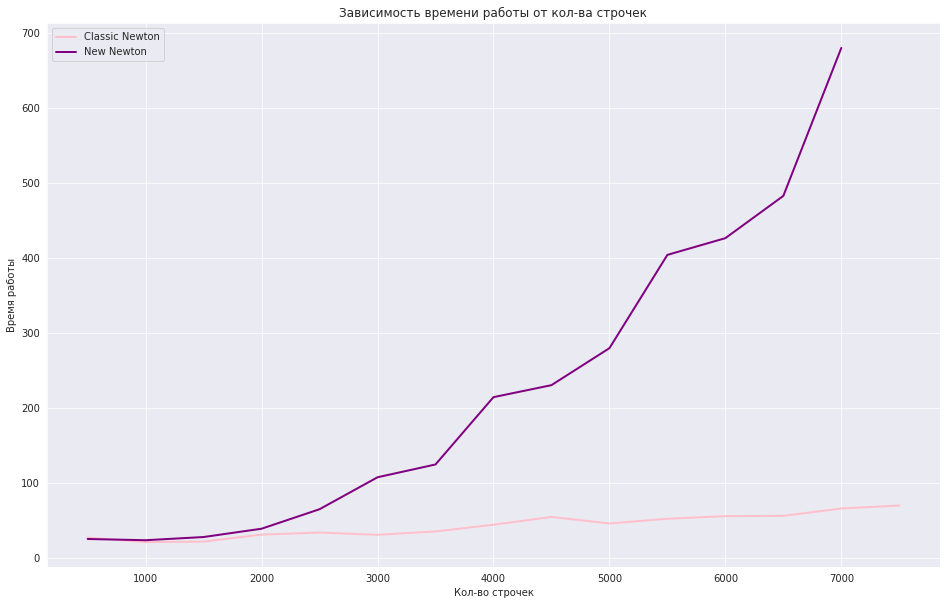

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

size_corrected = np.arange(500, 7501, 500)

with sns.axes_style('darkgrid'):
  plt.figure(figsize=(16,10))
  plt.title('Зависимость времени работы от кол-ва строчек')
  plt.plot(size_corrected , time_basic, lw=2, c='pink', label='Classic Newton')
  plt.plot(size_corrected[:14], time_new, lw=2, c='purple', label='New Newton')
  plt.legend(loc='best')
  plt.xlabel('Кол-во строчек')
  plt.ylabel('Время работы')

Понятно - что основной движ в начале - приблизим там график чтоб было понятно че происходит

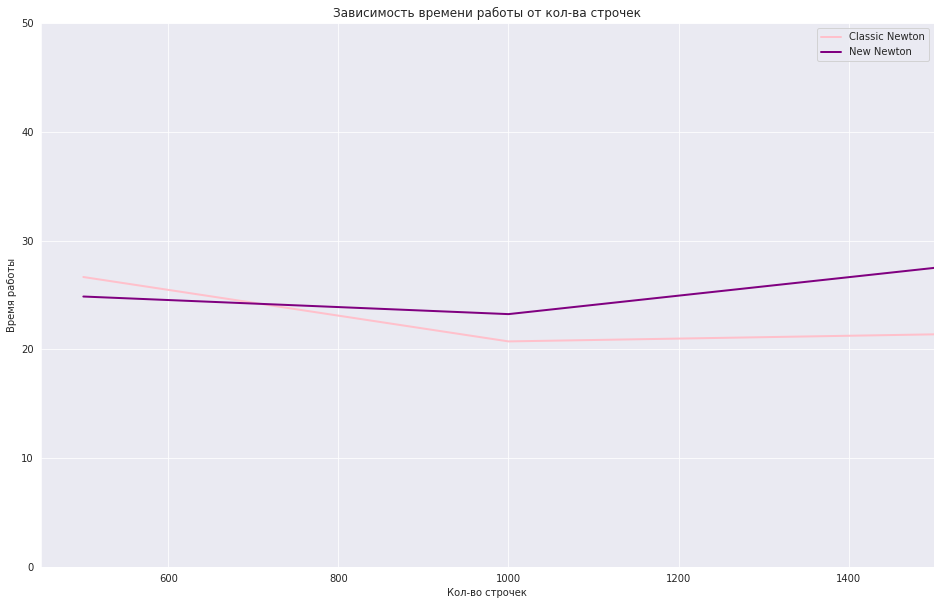

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

size_corrected = np.arange(500, 7501, 500)

with sns.axes_style('darkgrid'):
  plt.figure(figsize=(16,10))
  plt.title('Зависимость времени работы от кол-ва строчек')
  plt.plot(size_corrected , time_basic, lw=2, c='pink', label='Classic Newton')
  plt.plot(size_corrected[:14], time_new, lw=2, c='purple', label='New Newton')
  plt.legend(loc='best')
  plt.xlabel('Кол-во строчек')
  plt.ylabel('Время работы')
  plt.xlim((450,1500))
  plt.ylim((0,50))

Выходит что где-то с 700 строк обычный ньютон работает в разы быстрее чем можифицированный

Пункт 4

[1] Сравните по итерациям, построенные на семинаре квазиньютоновские методы для полной матрицы  𝐴 :

DFP

BFGS

BB с обоими типами шагов

L-BFGS (с различным размером памяти)

Украдем опять код с семинара

In [ ]:
class DFP:
    def __init__(self, StepSizeChoice, return_history=True, name=None):
        self.name = name
        self.StepSizeChoice = StepSizeChoice
        self.return_history = return_history
        self.history = []
    
    @staticmethod
    def update_H(H, s, y):
        Hy = H @ y
        H1 = np.outer(Hy, Hy) / (np.dot(y, H @ y) + 1e-12)
        H2 = s.T @ s / (y.T @ y + 1e-12)
        H_next = H - H1 + H2
        return H
    
    def solve(self, x0, f, gradf, tol=1e-3, max_iter=10000):
        self.history = [(x0, time.time())]
        x = x0.copy()
        k = 0
        x_prev = None
        g_next = gradf(x)
        H = np.identity(x.shape[0])
        while x_prev is None or np.linalg.norm(gradf(x)) > tol: 
            g = g_next
            h = -H @ g
            alpha = self.StepSizeChoice(x, h, k, gradf, f)
            x_prev, x = x, x + alpha * h
            g_next = gradf(x)
            s = x - x_prev
            y = g_next - g
            if k == 0:
                H = np.identity(x.shape[0]) * (y.T @ s) / (y.T @ y)
            H = DFP.update_H(H, s, y)
            if self.return_history:
                self.history.append((np.linalg.norm(gradf(x)), time.time()))
            if k >= max_iter:
                break
            k += 1
        return x

In [ ]:
class BFGS:
    def __init__(self, StepSizeChoice, return_history=True, name=None):
        self.name = name
        self.StepSizeChoice = StepSizeChoice
        self.return_history = return_history
        self.history = []
    
    @staticmethod
    def update_H(H, s, y):
        rho = 1 / (y.T @ s)
        ssT = np.outer(s, s)
        H1 = (rho**2)*np.dot(y, H@y)*ssT
        H2 = rho * np.outer(s, H @ y)
        H3 = H2.T        
        H = H + H1 - H2 - H3 + rho * ssT
        return H
    
    def solve(self, x0, f, gradf, tol=1e-3, max_iter=10000):
        self.history = [(x0, time.time())]
        x = x0.copy()
        k = 0
        x_prev = None
        g_next = gradf(x)
        H = np.identity(x.shape[0])
        while x_prev is None or np.linalg.norm(gradf(x)) > tol: 
            g = g_next
            h = -H @ g
            alpha = self.StepSizeChoice(x, h, k, gradf, f)
            x_prev, x = x, x + alpha * h
            g_next = gradf(x)
            s = x - x_prev
            y = g_next - g
            if k == 0:
                H = np.identity(x.shape[0]) * (y.T @ s) / (y.T @ y)
            H = BFGS.update_H(H, s, y)
            if self.return_history:
                self.history.append((np.linalg.norm(gradf(x)), time.time()))
            if k >= max_iter:
                break
            k += 1
        return x

In [ ]:
class BB_method:
    def __init__(self, StepSizeChoice, return_history=True, name=None, type_method="I"):
        self.name = name
        self.StepSizeChoice = StepSizeChoice
        self.return_history = return_history
        self.history = []
        self.type_method = type_method
    
    @staticmethod
    def alpha_calc(s, y, type_method):
        if type_method == "I":
            alpha = (s.T @ s) / (s.T @ y + 1e-12)
        elif type_method == "II":
            alpha = (s.T @ y) / (y.T @ y + 1e-12)
        else:
            raise Exception("Unrecognized type of method")
            
        return alpha
    
    def solve(self, x0, f, gradf, tol=1e-3, max_iter=10000):
        self.history = [(x0, time.time())]
        x = x0.copy()
        k = 0
        x_prev = None
        g_next = gradf(x)
        alpha = None
        while x_prev is None or np.linalg.norm(gradf(x)) > tol: 
            g = g_next
            if alpha is None:
                alpha = self.StepSizeChoice(x, -g, k, gradf, f)
            x_new = x - alpha * g
            fnew = f(x_new)
            if np.isnan(fnew) or fnew >= 1e10:
                alpha = self.StepSizeChoice(x, -g, k, gradf, f)
                x_new = x - alpha * g
            x_prev, x = x, x_new
            g_next = gradf(x)
            s = x - x_prev
            y = g_next - g
            alpha = BB_method.alpha_calc(s, y, type_method=self.type_method)
            if self.return_history:
                self.history.append((np.linalg.norm(gradf(x)), time.time()))
            if k >= max_iter:
                break
            k += 1
        return x

In [ ]:
class LBFGS:
    def __init__(self, StepSizeChoice, m=10, return_history=True, name=None):
        self.name = name
        self.StepSizeChoice = StepSizeChoice
        self.return_history = return_history
        self.history = []
        self.m = m
        self.s_hist = []
        self.y_hist = []
    
    def update_lists(self, s, y):
        self.s_hist.append(s)
        self.s_hist = self.s_hist[-self.m:]
        self.y_hist.append(y)
        self.y_hist = self.y_hist[-self.m:]
    
    def get_h(self, current_grad):
        m = len(self.s_hist)
        if m == 0:
            return -current_grad
        
        q = current_grad
        alpha = np.zeros(len(self.s_hist))
        rho = np.zeros(len(self.s_hist))
        for i in range(m-1, -1, -1):
            rho[i] = 1. / self.s_hist[i].dot(self.y_hist[i])
            alpha[i] = self.s_hist[i].dot(q) * rho[i]
            q = q - alpha[i] * self.y_hist[i]
        
        s, y = self.s_hist[-1], self.y_hist[-1]
        r = q * y.dot(s) / y.dot(y)
        
        for i in range(m):
            beta = rho[i] * self.y_hist[i].dot(r)
            r = r + self.s_hist[i] * (alpha[i] - beta)
        return -r

    def solve(self, x0, f, gradf, tol=1e-3, max_iter=10000):
        self.history = [(x0, time.time())]
        x = x0.copy()
        k = 0
        x_prev = None
        while x_prev is None or np.linalg.norm(gradf(x)) > tol: 
            g = gradf(x)
            h = self.get_h(g)
            alpha = self.StepSizeChoice(x, h, k, gradf, f)
            x_prev, x = x, x + alpha * h
            g_next = gradf(x)
            s = x - x_prev
            y = g_next - g
            self.update_lists(s, y)
            if self.return_history:
                self.history.append((np.linalg.norm(gradf(x)), time.time()))
            if k >= max_iter:
                break
            k += 1
        return x

In [ ]:
step_size = Armijo(rho=0.9, beta=0.1, alpha0=1.)
methods = [DFP(step_size, name="DFP"),
           BFGS(step_size, name="BFGS"),
           LBFGS(step_size, m=5, name="L-BFGS witn m=5"),
           LBFGS(step_size, m=10, name="L-BFGS with m=10"),
           LBFGS(step_size, m=20, name="L-BFGS with m=20"),
           LBFGS(step_size, m=50, name="L-BFGS with m=50"),
           BB_method(step_size, type_method="I", name="BB I"),
           BB_method(step_size, type_method="II", name="BB II"),
          ]

In [ ]:
from collections import defaultdict

N = 2000
tol = 1e-4
histories = defaultdict(dict)

for method in methods:
    print(method.name)
    f, gradf, hessf = getLSE(A, b, sigma=sigma)
    x0 = np.zeros((A.shape[1],))
    x = method.solve(x0, f, gradf, tol=1e-4, max_iter=N)
    histories[method.name] = method.history
    print("\t Tolerance achived ", np.linalg.norm(gradf(x))<=tol)

DFP
	 Tolerance achived  True
BFGS
	 Tolerance achived  True
L-BFGS witn m=5
	 Tolerance achived  True
L-BFGS with m=10
	 Tolerance achived  True
L-BFGS with m=20
	 Tolerance achived  True
L-BFGS with m=50
	 Tolerance achived  True
BB I
	 Tolerance achived  True
BB II
	 Tolerance achived  True


<ipython-input-63-abc1deea7cd5>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  history = np.array(histories[method.name])[1:, 0]
<ipython-input-63-abc1deea7cd5>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  history = np.array(histories[method.name])[1:, 0]
<ipython-input-63-abc1deea7cd5>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the nd

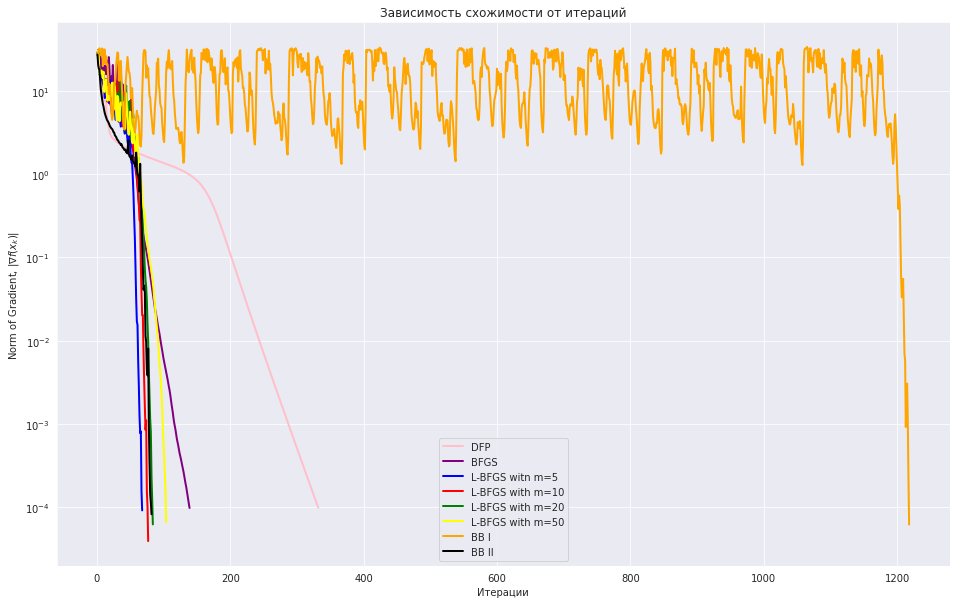

In [ ]:
colors=['pink', 'purple', 'blue', 'red', 'green', 'yellow', 'orange', 'black']

with sns.axes_style('darkgrid'):
  plt.figure(figsize=(16,10))
  plt.title('Зависимость схожимости от итераций')
  for i, method in enumerate(methods):
    history = np.array(histories[method.name])[1:, 0]
    plt.plot(np.arange(1, len(history) + 1), history, lw=2, c=colors[i], label=method.name)
  
  plt.legend(loc='best')
  plt.xlabel('Итерации')
  plt.yscale('log')
  plt.ylabel(r"Norm of Gradient, $\|\nabla f(x_k)\|$")

График широкий из-за того что BB I сильно больше итераций требует чем остальные но итак видно - что лучше всех L-BFGS with m = 5

Пункт 5

1] Сравните метод Ньютона и наиболее быстрый метод с предыдущего пункта по времени в зависимости от количества строчек в матрице  𝐴 . В данном случае, под методом ньютона для каждого отдельного  𝑚  подразумевается наиболее быстрый из модифицированного и немодифицированного (см. пункт 4)

В предыдущем пункте получили, что наиболее быстрый метод из всех предложенных там - это L-BFGS witn m=5

Приэтом из третьего пункта получим, что где то начиная с 700 быстрее обычный ньютон

Здесь я уже не выдержала тестировать на всей матрице целиком - поэтому только до 2000 строк

In [ ]:
from tqdm import tqdm

time_lbfgs = []
time_newton = []

size = np.arange(200, 2001, 200)

psi, grad_psi, hess_psi = getLSE_base()
hess_phi = sigma

for sz in tqdm(size):
    f, gradf, hessf = getLSE(A[:sz, :], b[:sz], sigma=sigma)
    x0 = x0 = np.zeros((A.shape[1],))

    now = time.time()
    lbfgs = LBFGS(step_size, m=5, name="L-BFGS witn m=5")
    x = lbfgs.solve(x0, f, gradf)
    time_lbfgs.append(time.time() - now)

    if sz > 700:
      now = time.time()
      newton = Newton(Armijo(rho=0.9, beta=0.1, alpha0=1.))
      x_newt = newton.solve(x0, f, gradf, hessf)
      time_newton.append(time.time() - now)
    
    else:
      now = time.time()
      newnewton = NewNewton(Armijo(rho=0.9, beta=0.1, alpha0=1.))
      x_newnewt = newnewton.solve(x0, A[:sz, :], -b[:sz], f, gradf, hess_phi, hess_psi)
      time_newton.append(time.time() - now)

100%|██████████| 10/10 [03:49<00:00, 22.98s/it]


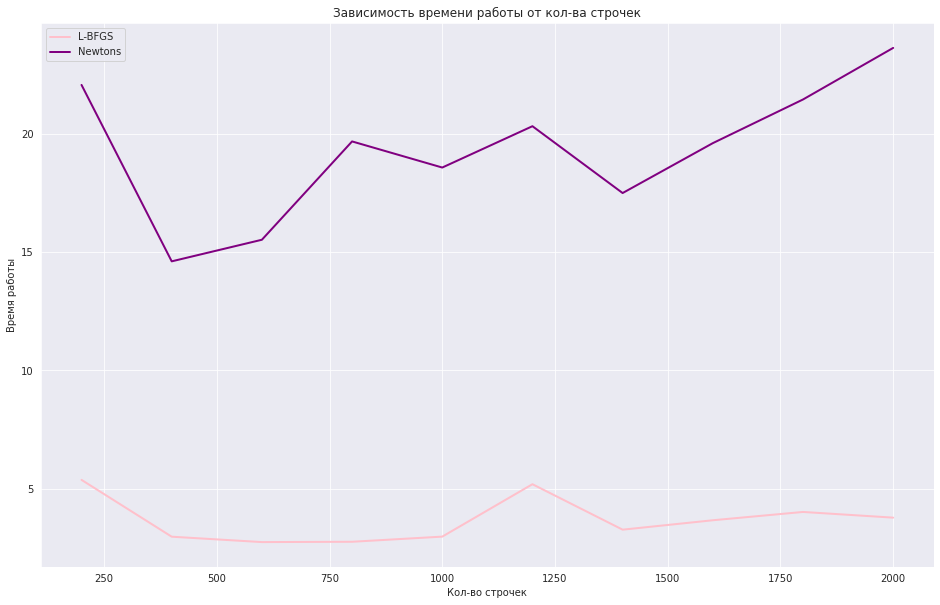

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

with sns.axes_style('darkgrid'):
  plt.figure(figsize=(16,10))
  plt.title('Зависимость времени работы от кол-ва строчек')
  plt.plot(size, time_lbfgs, lw=2, c='pink', label='L-BFGS')
  plt.plot(size, time_newton, lw=2, c='purple', label='Newtons')
  plt.legend(loc='best')
  plt.xlabel('Кол-во строчек')
  plt.ylabel('Время работы')

# Задача 2. Квази-ньютоновские методы [3]

1. [2] Объясните, почему в методах BFGS и L-BFGS направление является направлением убывания

2. [1] Покажите, что использование правила Вольфа для подбора шага гарантирует, что $s_k^\top y_k > 0$

### Решение задачи 2:

### Решение

1)[2]

BFGS - решается задача оптимизации функционала. Функция раскладывается в полином следующим образом:

$f(x_k + p) = f(x_k) + ∇f^T(x_k)p + \frac{1}{2}p^TB_kp, B_k - $ симм полож опред

Минимум полученной задачи:

$p_k = -B_k^{-1}\nabla f(x_k)$ - является направлением, покажем, что оно же направление убывания. Для этого надо определить знак $∇f^T(x_k)p_k = -∇f^T(x_k)B_k^{-1}\nabla f(x_k) < 0 (очевидно), $ значит это направление убывания

L-BFGS - аналогично

2) [1]

$α_k$ - удовлетворяет правилам Вольфа, значит что из них следует, что

$\nabla f(x_k + α_k p_k)^T p_k \geq c_2 \nabla f_k^T p_k, 0 < c_2 < 1$

При этом $s_k = x_{k+1} - x_k = α_k p_k$

Рассмотрим $y^T_ks_k = (\nabla f^T(x_{k+1}) - \nabla f^T(x_{k}))s_k \geq_{(Вольф)} c_2 \nabla f_k^T \alpha_k p_k - \nabla f_k^T \alpha_k p_k = (c_2 - 1)\nabla f_k^T \alpha_k p_k $

Из пункта 1 а также того, что $c_2 < 1$ получаем требуемое утверждение


# Задача 3. L-BFGS [5]

Рассмотрим алгоритм L-BFGS, приведенный на семинаре. В данном упражнении предлагается показать, что данный алгоритм действительно реализует умножение матрицы $H_k$ на $\nabla f_k$. Введем обозначение $H_{k-m}:=H_k^0, H_{j+1}=V_{j}^\top H_{j} V_{j} +\rho_j s_j s_j^\top$

1. [2] Обозначим за $q_l$ вектор в ячейке $q$ в момент $i=l$ и формально $q_k=\nabla f_k$. Покажите, что в первом цикле в момент $i=l, l=\overline{k-1, k-m}$ Вы получите вектор $q_{i}= V_{l}\dots V_{k-1} \nabla f(x_k)$. Соответственно, после первого цикла Вы имеете вектор $ V_{k-m}  \dots V_{k-1} \nabla f(x_k).$

2. [3] Обозначим за $r_l$ вектор в ячейке $r$ в момент $i=l$. Заметим, при инициализации в $r$ лежит вектор $r_{k-m-1}=H^0_k q_{k-m}=H_{k-m} q_{k-m}$. Покажите, что $r_l=H_{l+1} q_{l+1}.$ Соответсвенно, при выходе из цикла Вы получите $r=H_k q_k = H_k \nabla f_k,$ что и требовалось доказать

### Решение задачи 3:

  1) [2]

Рассмотрим переход от $q_i к q_{i-1}$

  Из алгоритма $q_{i-1} = q_i - \alpha_{i-1} y_{i-1} =_{\alpha_i = \rho_i s^T_i q_{i+1}}= q_i - \rho_{i-1}s^T_{i-1}q_i y_{i-1} = (I - \rho_{i-1}s^T_{i-1} y_{i-1})q_i =_{V_k=I - \rho_k y_ks^T_k} = V_{i-1} q_i$

Воспользуемся тем что формально $q_k=\nabla f_k$.

То есть на шаге $i:=k-1$ Получим $q_{k-1} = V_{k-1} ∇f_k$

Продолжая это построение получим требуемое

2) [3]

База индукции - при инициализации при $l = k - m - 1, r_l = H_{l+1}q_{l+1}$

Рассмотрим $r_{k-m} - $ хотим показать что $r_{k-m} = H_{k - m+1}q_{k - m + 1}$

$r_{k - m} = r_{k - m - 1} + s_{k - m}(\alpha_{k - m} - \beta_{k - m}) =_{\beta_{k-m} = \rho_{k-m}y^T_{k-m}r_{k-m-1}}= H_{k - m}q_{k-m} + s_{k-m}(\alpha_{k - m} - \rho_{k-m}y^T_{k-m}r_{k-m-1}) = H_{k - m}q_{k-m} + s_{k-m}\alpha_{k - m} - s_{k-m}\rho_{k-m}y^T_{k-m}r_{k-m-1} = H_{k - m}q_{k-m}(I - s_{k-m}\rho_{k-m}y^T_{k-m}) + s_{k-m}\alpha_{k - m} = H_{k - m}V_{k-m}q_{k-m} + s_{k-m}\alpha_{k - m}=_{1} V^T_{k-m}H_{k - m}V_{k-m}q_{k-m+1} + s_{k-m}\alpha_{k - m} =_{\alpha_i = \rho_i s^T_i q_{i+1}}= V^T_{k-m}H_{k - m}V_{k-m}q_{k-m+1} + s_{k-m}\rho_{k-m} s^T_{k-m} q_{k - m + 1} = H_{k-m+1}q_{k-m+1}$


где последний переход следует из формулы пересчета

Продолжая построение получаем требуемое




# Задача 4. Решение задачи на $\ell_1$-шаре [9]

Рассмотрим задачу поиска аналитического центра в виде:

\begin{align*}
& \min_{x \in \mathbb{R}^n} - \sum_{i=1}^m \log(1 - a_i^{\top}x)\\
\text{s.t. } & \|x\|_1 \leq n
\end{align*}

Вектора $a_i$ инициализированы ниже.

1. [3] Выведите выражение для вычисления проекции на множество $\{x|\|x\|_1\leq n\}$. Напишите функцию для её вычисления.

2. [2] Выведите выражение для решения задачи линейного программирования для ограничения $\|x\|_1\leq n$. Напишите функцию для её вычисления.
    
3. [1] Используя `cvxpy,` найдите решение задачи (с заведомо высокой точностью)

4. [3] Сравните сходимость (по времени и по итерациям) метода Франка-Вольфа и проективного градиента на задаче поиска аналитического центра.

    Начальная точка - нулевой вектор. Для обоих методов используйте метод Армихо для поиска шага. Сравните разреженность точек $x_k$, получающихся на итерациях обоих методов (т.е. постройте график зависимости числа ненулевых компонент от номера итерации).

### Решение задачи 4:

In [ ]:
import cvxpy as cp

1) [3] 

В Дз2 Решали:

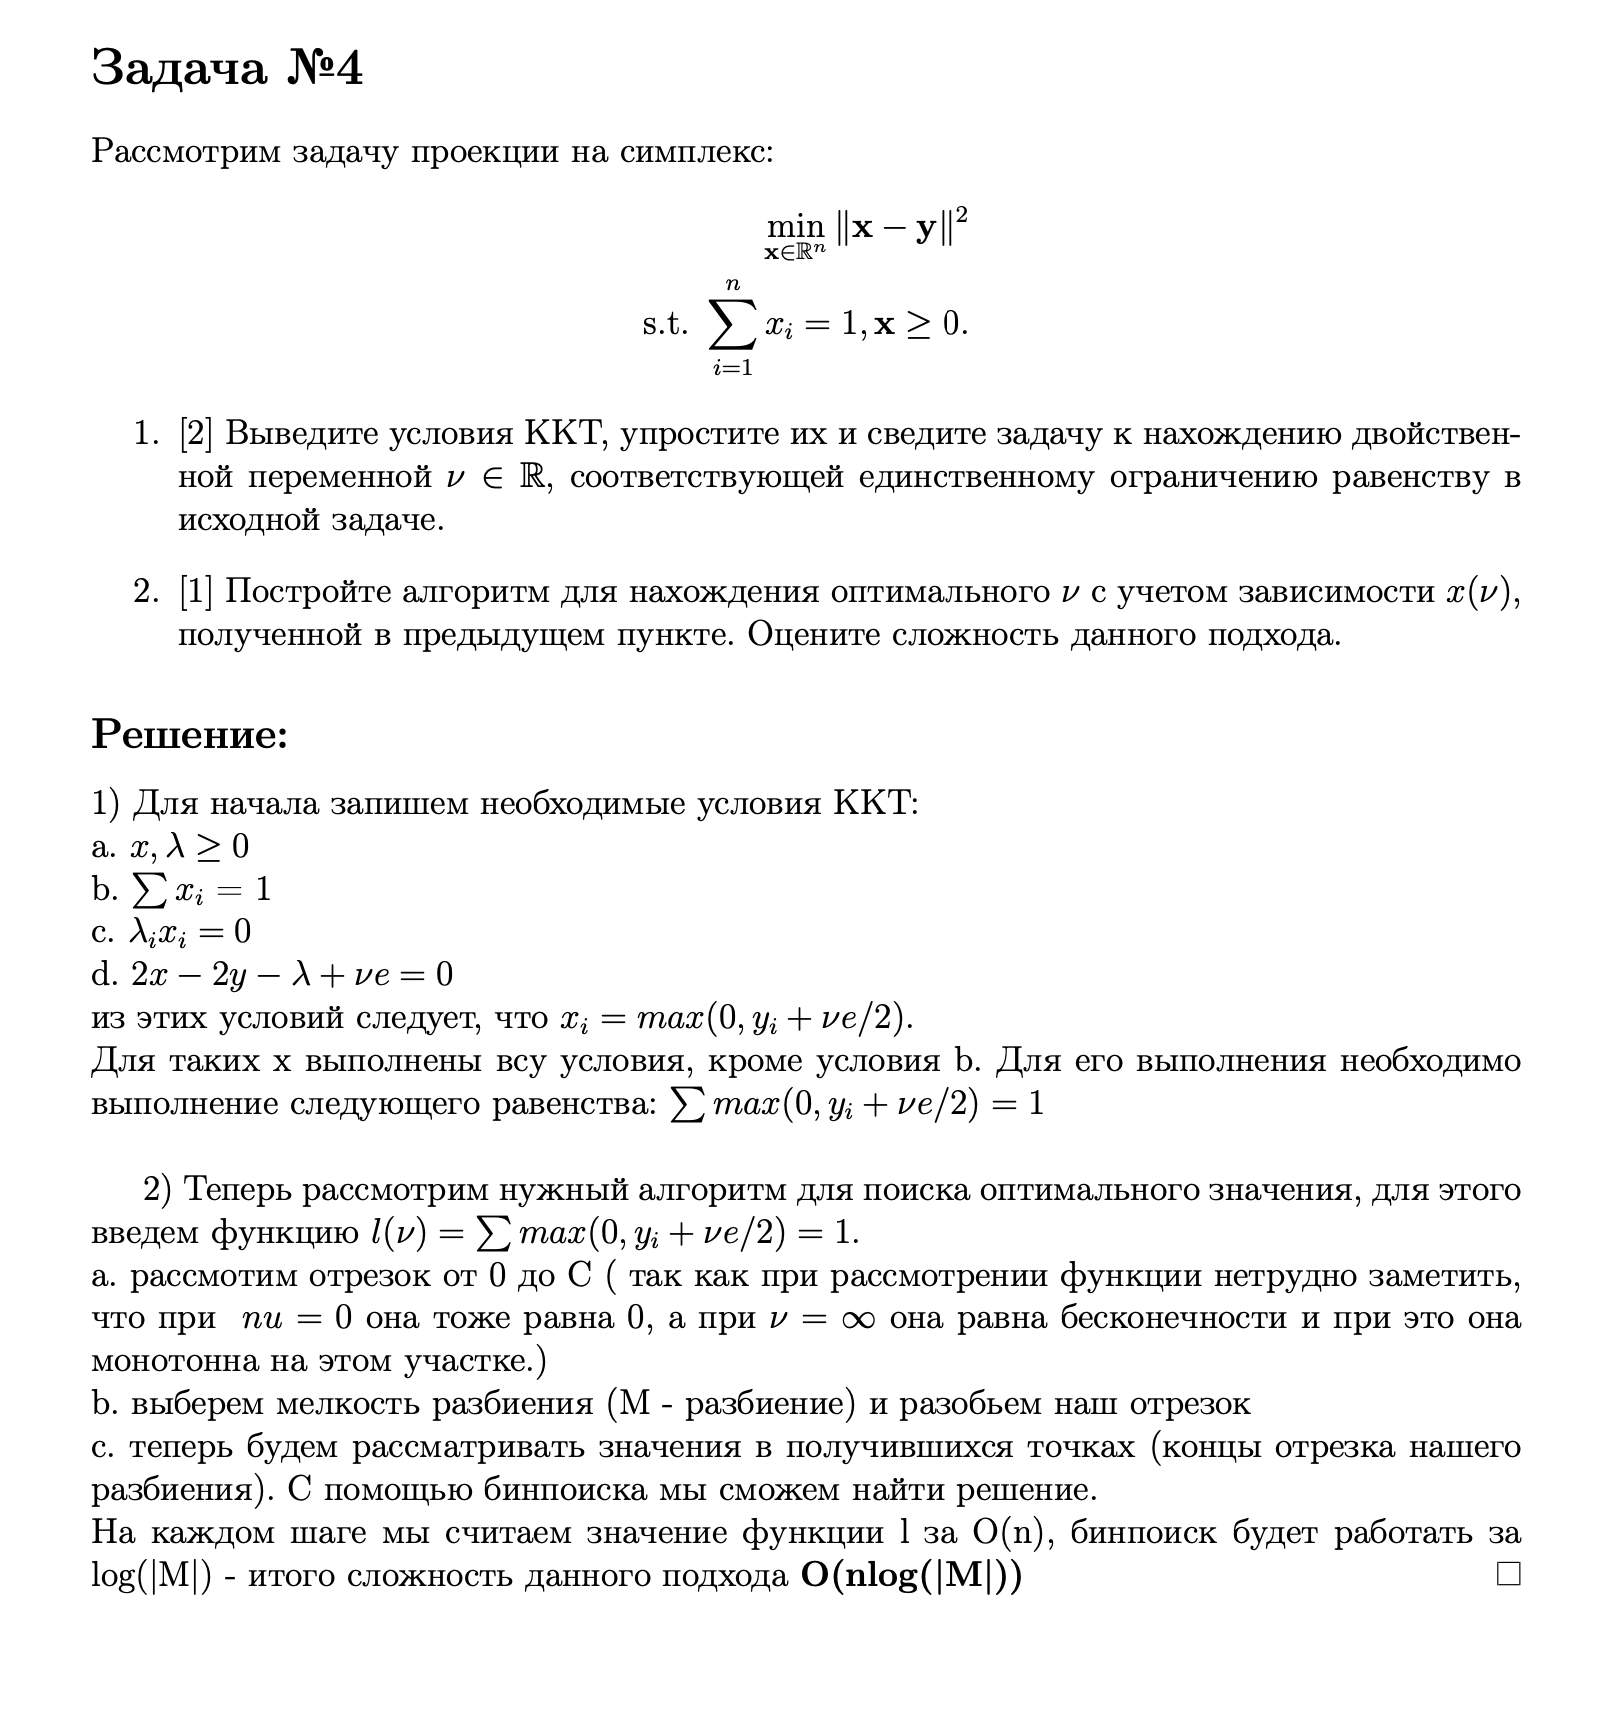


Итого:

$x_i = max(0, y_i - \frac{\lambda}{2})$

и должно выполняться равенство

$\sum x_i = n = \sum max(0, y_i - \frac{\lambda}{2})$

Как уже утверждалось в задаче - найти оптимальное значение можно бинпоиском по ответу - границы возьмем симметрично с запасом

In [ ]:
def find_proj(y):
  lambd = binsearch(np.abs(y), n)
  return np.sign(y) * np.maximum(0, np.abs(y) - lambd / 2)

def binsearch(y, n):
  if np.sum(y) <= n:
    return 0

  l, r = -4 * np.max(y), 4 * np.max(y)

  while r - l > 1e-3:  # порог
    mid = (r + l) / 2
    sum = np.maximum(0, y - mid / 2).sum()

    if sum < n:
      r = mid
    else:
      l = mid

  mid = (l + r) / 2
  return mid

[2] Выведите выражение для решения задачи линейного программирования для ограничения  ‖𝑥‖1≤𝑛 . Напишите функцию для её вычисления.

Решаем задачу 

\begin{align*}
& \min_{x \in \mathbb{R}^n} x^\top y\\
\text{s.t. } & \|x\|_1 \leq n
\end{align*}

Её можно переписать как $\min_{\| x \|_1 \leq n} x^\top y$. Решение этой задачи: $-n\max|y_i|$ (просто расписали двойственную норму). Запрогаем:

In [ ]:
def lp(y):
    res = np.zeros(y.shape)
    res[np.argmax(np.abs(y))] = -n * np.sign(y[np.argmax(np.abs(y))])
    return res

[1] Используя cvxpy, найдите решение задачи (с заведомо высокой точностью)

In [ ]:
x = cp.Variable(n)

obj = cp.Minimize(-cp.sum(cp.log(1 - A @ x)))
cstr = [cp.sum(cp.abs(x)) <= n]

prob = cp.Problem(obj, cstr)
sol = prob.solve()
sol

-798.4226648467027

[3] Сравните сходимость (по времени и по итерациям) метода Франка-Вольфа и проективного градиента на задаче поиска аналитического центра.

In [ ]:
np.random.seed(1)
n = 100
m = 200
A = np.random.rand(m, n)

Украденный семинарский код х inf

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
class ProjectedGD:
    def __init__(self, StepSizeChoice, return_history=True, name=None):
        self.name = name
        self.StepSizeChoice = StepSizeChoice
        self.return_history = return_history
        self.history = []
    
    def solve(self, x0, f, gradf, proj, tol=1e-3, max_iter=10000):
        self.history = []
        x = x0.copy()
        k = 0
        x_prev = None
        start = time.time()
        while x_prev is None or np.linalg.norm(x - x_prev) > tol: 
            h = -gradf(x)
            alpha = self.StepSizeChoice(x, h, k, gradf, f)
            x_prev, x = x, proj(x + alpha * h)
            if self.return_history:
                self.history.append((np.linalg.norm(x - x_prev), x, time.time() - start))
            if k >= max_iter:
                break
            k += 1
        self.history = np.array(self.history)
        return x
    
class FrankWolfe:
    def __init__(self, StepSizeChoice, return_history=True, name=None):
        self.name = name
        self.StepSizeChoice = StepSizeChoice
        self.return_history = return_history
        self.history = []
    
    def solve(self, x0, f, gradf, linprogsolver, tol=1e-3, max_iter=10000):
        self.history = []
        x = x0.copy()
        k = 0
        x_prev = None
        start = time.time()
        while x_prev is None or np.linalg.norm(x - x_prev) > tol:
            g = gradf(x)
            s = linprogsolver(g)
            h = s - x
            alpha = self.StepSizeChoice(x, h, k, gradf, f)
            if alpha >= 1:
                alpha = 1
            x_prev, x = x, x + alpha * h
            if self.return_history:
                self.history.append((np.linalg.norm(x - x_prev), x, time.time() - start))
            if k >= max_iter:
                break
            k += 1
        self.history = np.array(self.history)
        return x
    
    
import time
import numpy as np


class StepSize:
    def __call__(self, x, h, k, *args, **kwargs):
        pass


class ConstantStepSize(StepSize):
    def __init__(self, alpha):
        self.alpha = alpha
    
    def __call__(self, x, h, k, *args, **kwargs):
        return self.alpha


class SeqStepSize(StepSize):
    def __init__(self, d=1, alpha0=1, alpha_function=None):
        if alpha_function is not None:
            self.alpha_function = alpha_function
        else:
            self.alpha_function = lambda k: alpha0/(k+1)**d
    
    def __call__(self, x, h, k, *args, **kwargs):
        return self.alpha_function(k)


class Armijo(StepSize):
    def __init__(self, beta=0.3, rho=0.1, alpha0=1):
        self.beta = beta
        self.rho = rho
        self.alpha0 = alpha0
    
    def __call__(self, x, h, k, gradf, f, *args, **kwargs):
        beta, rho, alpha = self.beta, self.rho, self.alpha0
        fx = f(x)
        hg = h.dot(gradf(x))
        while f(x + alpha * h) > fx + beta * alpha * hg:
            alpha *= rho
        return alpha

Запрогаем функцию и её градиент:

In [ ]:
def f(x):
    return -np.sum(np.log(1 - A @ x))

def gradf(x):
    return np.sum(A.T @ (1 / (1 - A @ x)).reshape(-1, 1), axis=1)

In [ ]:
fw = FrankWolfe(Armijo(rho=0.9, beta=0.1, alpha0=1.))
x_f = fw.solve(np.zeros(n), f, gradf, lp)
pgd = ProjectedGD(Armijo(rho=0.9, beta=0.1, alpha0=1.))
x_p = pgd.solve(np.zeros(n), f, gradf, find_proj) 

In [ ]:
print(f(x_f), '\n', sol, '\n', f(x_p))

-798.4226653448136 
 -798.4226648467027 
 -798.4242406346219


Все способы совпали с точностью до 4-5 знака после запятой что достаточно неплохо(хотя если кто-то возьмет погрешность в 1e-6 я буду грустить)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

size_corrected = np.arange(500, 7501, 500)

with sns.axes_style('darkgrid'):
  plt.figure(figsize=(16,10))
  plt.title('Зависимость времени работы от кол-ва строчек')
  plt.plot(size_corrected , time_basic, lw=2, c='pink', label='Classic Newton')
  plt.plot(size_corrected[:14], time_new, lw=2, c='purple', label='New Newton')
  plt.legend(loc='best')
  plt.xlabel('Кол-во строчек')
  plt.ylabel('Время работы')
  plt.xlim((450,1500))
  plt.ylim((0,50))

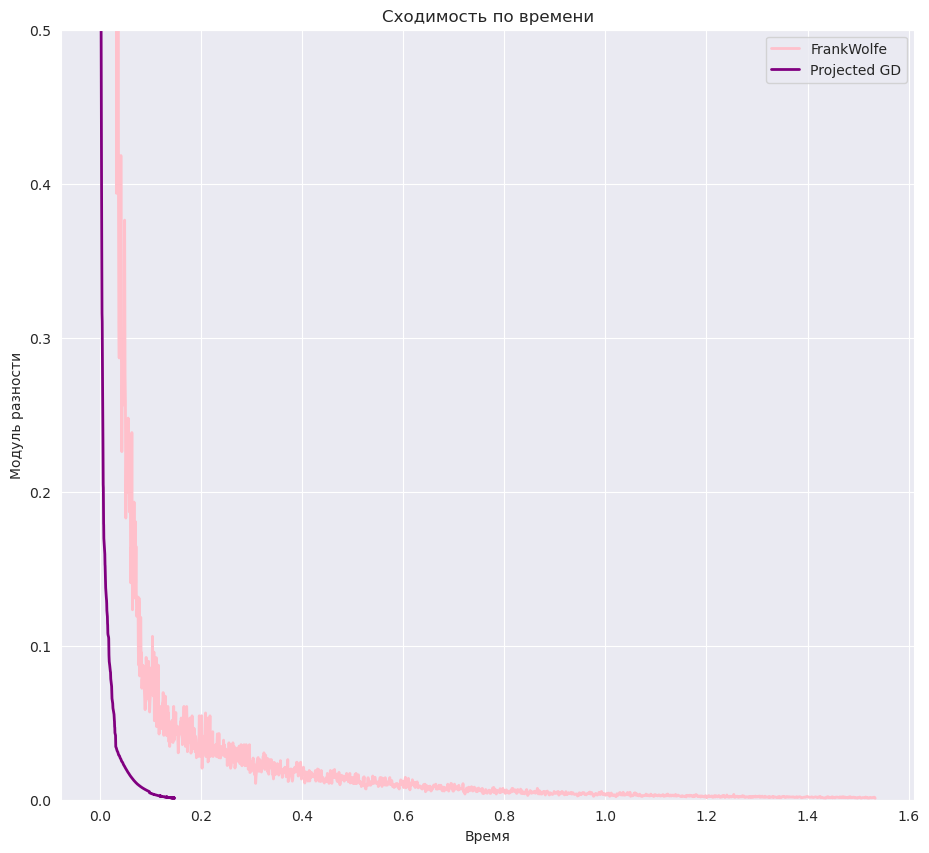

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

with sns.axes_style('darkgrid'):
    plt.figure(figsize=(11, 10))
    plt.title('Сходимость по времени')
    plt.plot(fw.history[:, 2], fw.history[:, 0], lw=2, c='pink', label='FrankWolfe')
    plt.plot(pgd.history[:, 2], pgd.history[:, 0], lw=2, c='purple', label='Projected GD')
    plt.legend(loc='best')
    plt.xlabel('Время')
    plt.ylabel('Модуль разности')
    plt.ylim((0, 0.5))

Из графика можно сделать вывод что Метод проекций сходится гораздо быстрее чем FW

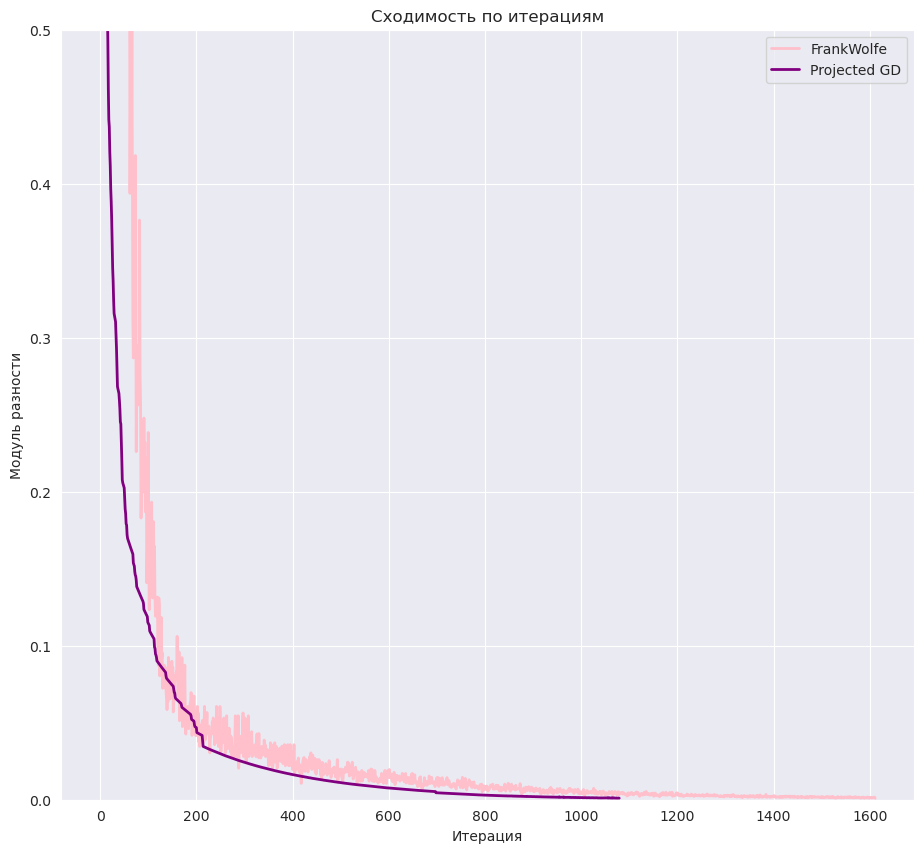

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

with sns.axes_style('darkgrid'):
    plt.figure(figsize=(11, 10))
    plt.title('Сходимость по итерациям')
    plt.plot(np.arange(len(fw.history[:, 2])), fw.history[:, 0], lw=2, c='pink', label='FrankWolfe')
    plt.plot(np.arange(len(pgd.history[:, 2])), pgd.history[:, 0], lw=2, c='purple', label='Projected GD')
    plt.legend(loc='best')
    plt.xlabel('Итерация')
    plt.ylabel('Модуль разности')
    plt.ylim((0, 0.5))

На данном графике есит пересечение где то в районе 200 итераций но в целом опять же метод проекций сходится быстрее чем FW

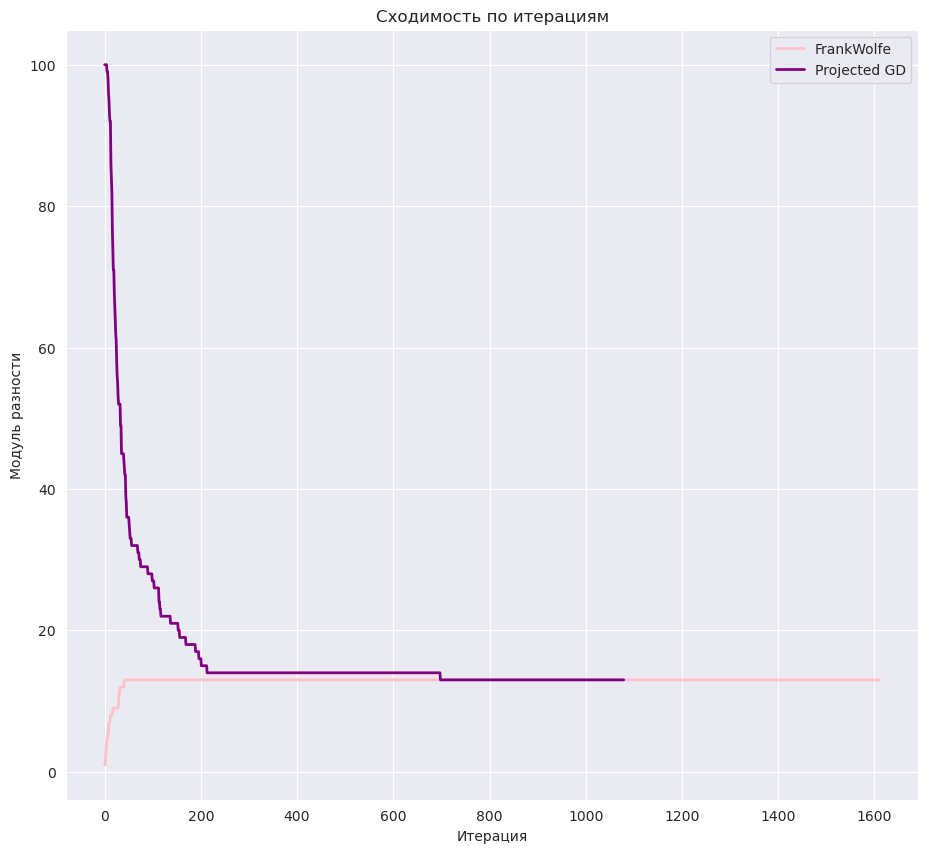

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

nfw = [np.count_nonzero(x) for x in fw.history[:, 1]]
npgd = [np.count_nonzero(x) for x in pgd.history[:, 1]]
with sns.axes_style('darkgrid'):
    plt.figure(figsize=(11, 10))
    plt.title('Сходимость по итерациям')
    plt.plot(np.arange(len(fw.history[:, 2])), nfw, lw=2, c='pink', label='FrankWolfe')
    plt.plot(np.arange(len(pgd.history[:, 2])), npgd, lw=2, c='purple', label='Projected GD')
    plt.legend(loc='best')
    plt.xlabel('Итерация')
    plt.ylabel('Модуль разности')

Из данного графика можно сделать 2 вывода:

1) Оба метода в конечном итоге сливаются, сходясь к одному значению

2) Наглядно видно как они сходятся с разных сторон. Это обуслувлено тем что методы противоположны друг другу в плане разреженности векторов

## Задача 5. ММП с разреженной матрицей ковариации [7]

Пусть Вам дано $m$ векторов $\{x_i\}_{i=1}^m$ из $\mathbb{R}^n$, про которых известно что они сгенерированы из некоторого нормального распределения с параметрами $(\textbf{0}, \Sigma)$. Теперь поставим  задачу поиска оценки матрицы $\Sigma^{-1}$ на основе оценки максимального правдоподобия:

$$\ln L(x|\Sigma)\rightarrow \max_{\Sigma\in \mathbb{S}^n_+}$$

Переходя к задаче оптимизации по $A=\Sigma^{-1}$ (см. формулу плотности для невырожденного гауссового многомерного распределения):

$$\frac{1}{2m}\sum\limits_{i=1}^m x_i^\top A x_i - \frac{1}{2}\ln\det A \rightarrow \min_{A\in \mathbb{S}^n_{++}}$$

Добавим к постановке регуляризатор на разреженность обратной матрицы ковариации $\Sigma^{-1}$. При этом учтем, что диагональ штрафовать не нужно. Это делается добавлением к целевой функции слагаемого вида $\sigma \sum_{i \neq j} |(\Sigma^{-1})_{ij}|$, то есть поэлементная $\ell_1$ регуляризация для задачи наименьших квадратов, только теперь у нас разрежен не вектор, а матрица:

$$F(A)= \frac{1}{2m}\sum\limits_{i=1}^m x_i^\top A x_i- \frac{1}{2}\ln\det A + \sigma \sum\limits_{i\neq j} |A_{ij}|\rightarrow \min_{A\in \mathbb{S}^n_{++}}$$

Выделим гладкую часть $f(A)= \frac{1}{2m}\sum\limits_{i=1}^m x_i^\top A x_i- \frac{1}{2}\ln\det A$ и негладкую $g(A)=\sigma \sum\limits_{i\neq j} |A_{ij}|$.

**Задачи:**

1. [1] Найдите аналитическое выражение для градиента $f$. Реализуйте его вычисление в методе `gradf`.

2. [2] Найдите аналитическое выражение для проскимального оператора для функции $g$. Реализуйте его вычисление в методе `proxg`.

3. [2] Решите поставленную задачу проксимальным градиентным методом для $\sigma=1$. Подберите количество итераций необходимое для сходимости по функции и постройте график.

4. [2] Используя построенный проксимальный метод, решите данную задачу для значений $\sigma\in[10^{-2}, 10^{2}]$. Для каждой $\sigma$ выведите количество ненулевых компонент и значение функции $f$. Постройте график зависимости числа ненулевых компонент от $\sigma$. Проанализируйте график.

В выше поставленной задаче требуется найти именно $A=\Sigma^{-1}$ и решать задачу оптимизизации относительно нее. Данные `X` возьмите из файла `X.npy` из папки `data/task5`.

[1] Найдите аналитическое выражение для градиента  𝑓 . Реализуйте его вычисление в методе gradf. 


$$
\nabla f(A) = \frac{1}{2m} \sum\limits_{i=1}^m x_i x_i^T - \frac{1}{2} A^{-1}
$$

[2] Найдите аналитическое выражение для проскимального оператора для функции  𝑔 . Реализуйте его вычисление в методе proxg.

$$\text{prox}_g(X) = argmin_{A}(\sigma\sum_{i\neq j}|A_{ij}| + \frac{1}{2\alpha}||A - X||^2_2)$$
$$(\text{prox}_g(X))_{ii}= X_{ii} \\
(\text{prox}_g(X))_{ij} = \arg\min_{A_{ij}}(\sigma|A_{ij}| + \frac{1}{2\alpha}(A_{ij}-X_{ij})^2)$$ при $i \neq j$.  Но эту штуку мы находили в курсе машинки, ибо это проксимальная оператор для лассо регуляризации и аналитическое выражение для неё выглядит так
$$sign(X_{ij})\max(|X_{ij}| - \sigma\alpha, 0) $$

In [ ]:
class MLE_l1:
    """
    Class for problem Maximum Likelihood Estimation of inverse Covariance Matrix
    with element-wise l_1 regularization.
    """
    def __init__(self, X, sigma=0.):
        """
        :param X: np.array[m, n], generated data
        :param sigma: float, parameter of regularization
        """
        self.X = X
        self.XTX = X.T @ X
        self.m, self.n = X.shape
        self.sigma = sigma

    @staticmethod
    def _log_det(A):
        """
        Compute the logarithm of the determinant of an array via Cholesky Decomposition.
        :param A: np.array[n,n], square matrix
        :return: float, log det (A) if is PSD or -inf else
        """
        try:
            L = np.linalg.cholesky(A)
        except:
            return -np.inf
        diag_u = np.diag(L)
        return 2 * np.log(diag_u).sum()

    def F(self, A):
        """
        Calculate function
        F(A)= 1/2m sum_{i=1}^m x_i^\top A x_i- 1/2 ln det A + sigma sum_{i\neq j} |A_{ij}|

        :param A: np.array[n,n], square matrix
        :return: float, F(A)
        """
        return self.f(A) + self.g(A)

    def f(self, A):
        """
        Calculate function
        f(A)= 1/2m sum_{i=1}^m x_i^\top A x_i- 1/2 ln det A

        :param A: np.array[n,n], square matrix
        :return: float, f(A)
        """
        return 1 / (2 * self.m) * np.trace(A @ self.XTX) -  1/2 * self._log_det(A)

    def gradf(self, A):
        """
        Calculate gradient of function f

        :param A: np.array[n,n], square matrix
        :return: np.array[n, n], f'(A) gradient, square matrix with the same shape as A
        """
        return 1 / (2 * self.m) * self.XTX - 1 / 2 * np.linalg.inv(A)

    def g(self, A):
        """
        Calculate function
        g(A)=  sigma sum_{i\neq j} |A_{ij}|

        :param A: np.array[n,n], square matrix
        :return: float, g(A)
        """
        return self.sigma * (np.abs(A).sum() - np.linalg.norm(np.diag(A), ord=1))

    def g_prox(self, A, alpha):
        """
        Calculate prox-operator of g at point A

        :param A: np.array[n,n], square matrix
        :param alpha: float, parameter for prox method
        :return: np.array[n, n], result of prox-operator, square matrix with the same shape as A
        """
        prox = np.sign(A) * np.maximum(np.abs(A) - self.sigma * alpha, 0)
        np.fill_diagonal(prox, np.diag(A))
        return prox

In [ ]:
# Месть для Вашего решения